# 感知机

<img src="./Image/深度学习入门：基于Python的理论与实现/感知机1.png" width=200 heigth=200 align='right'>
感知机由多个输入，一个输出构成，左侧的输入为0或1，当输入权值和到达一定值$\theta$时，右端则会输出1

$
y = 
\begin{cases}
0\quad (w_1x_1+w_2x_2 \le \theta) \\
1\quad (w_1x_1+w_2x_2 < \theta)
\end{cases}
$

下面的表达和上式等价，
$
y = 
\begin{cases}
0\quad (b+w_1x_1+w_2x_2 \le 0) \\
1\quad (b+w_1x_1+w_2x_2 > 0)
\end{cases}
$,
其中b称为**偏置**，取负值，$w_1$和$w_2$为**权重**

使用感知机能很轻易地实现与（非）门、或（非）门

In [25]:
def LogicGate(b, *wargs):
    def func(*xargs):
        x = np.array(xargs)
        w = np.array(wargs)
        tmp = np.sum(w * x) + b
        if tmp <= 0:
            return 0
        else:
            return 1

    return func


#与门
AND = LogicGate(-0.99, 0.5, 0.5)
print(AND(1, 1), AND(1, 0))
#与非门
NAND = LogicGate(0.99, -0.5, -0.5)
print(NAND(0, 0), NAND(0, 1))
#或门
OR = LogicGate(-0.49, 0.5, 0.5)
print(OR(0, 0), OR(0, 1), OR(1, 1))

1 0
1 1
0 1 1


<img src="./Image/深度学习入门：基于Python的理论与实现/感知机2.png" width=200 align='right'>
然而，感知机无法实现异或门，感知机实际上就是一个线性规划：无法通过一条直线将$(0,0)$和$(1,1)$划分到同一区域，而把$(0,1)$和$(1,0)$划分到另一区域；
但是，可以通过<b>多层感知机</b>，将门电路叠加实现异或，一个门不接受$(0,0)$的输入——或门，一个门不接受$(1,1)$的输入——与非门，将这两个门的结果通过一个与门，即可实现不接受$(1,1)/(0,0)$而接受$(1,0)$的输入：
<img src="./Image/深度学习入门：基于Python的理论与实现/感知机3.png" width=350>

In [26]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y
print(XOR(0,1),XOR(0,0),XOR(1,1))

1 0 0


# 神经网络

## 激活函数 

在上式中，令$h(x)=\begin{cases}0\quad (x \le 0) \\1\quad (x > 0)\end{cases},\quad a=w_1x_1+w_2x_2+b$则有$y=h(a)$，此处的$h$则称为激活函数，由于$h$分段不平滑，称为阶越函数，而像$h=\frac{1}{1+e^{-x}}$，为平滑的**sigmoid**函数

### astype类型转换
`y.astype(np.type)`将数组y中每一个元素转换为给定的`np.type`元素；
考虑下列的代码：

In [27]:
import numpy as np
x = np.array([-1,1,2])
x > 0

array([False,  True,  True])

此处用到了np数组的性质，即可以和0作比得到bool数组；当我们传进去一个x时，可以先将其转换为bool型，然后再用`astype`函数将其变为int值用于后续绘图
### 阶越函数

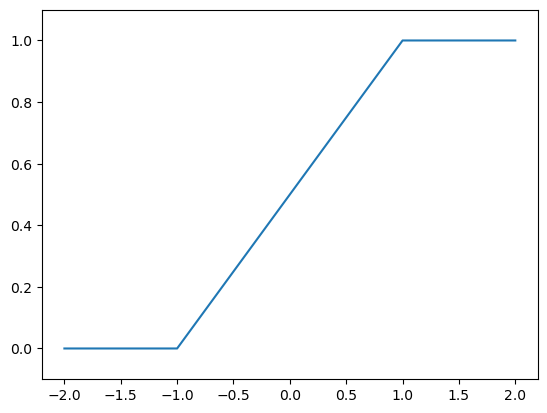

In [28]:
import numpy as np
import matplotlib.pylab as plt


def step_function(x):
    return np.array(x > 0, dtype=np.int_)


x = np.array([-2, -1, 1, 2])
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### Sigmoid函数

用到numpy数组可以广播的性质，我们可以直接传入一个数组，并将其当常值计算，最后返回结果仍为一个数组

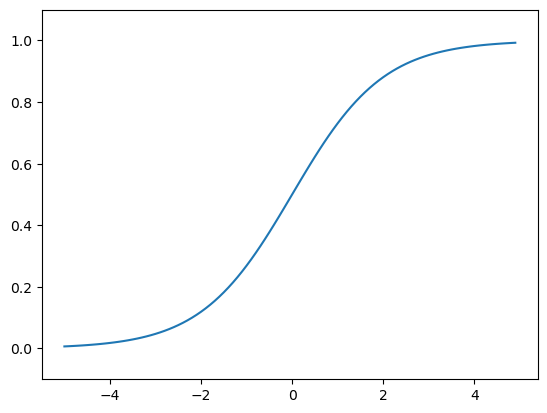

In [29]:
def Sigmoid(x):
    return 1 / (1 + np.exp(-x))


x = np.arange(-5, 5, 0.1)
y = Sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

Sigmoid函数和阶跃函数不同，它不在$x=0$处突变，只能输出0和1，而是平滑地在(0,1)取值。对于Sigmoid函数和阶跃函数，它们都是非线性的函数，在神经网络的叠加中，例如$y=h(h(h(x)))$，若$h(x)=cx$，则$y=c^3x$仍然可以表示为一层线性，故激活函数都要为非线性的函数

### ReLu函数 

ReLU函数在输入大于0时，直接输出该值；在输入小于等于0时，输出0：$h(x)=\begin{cases}0\quad (x \le 0) \\x\quad (x > 0)\end{cases}$

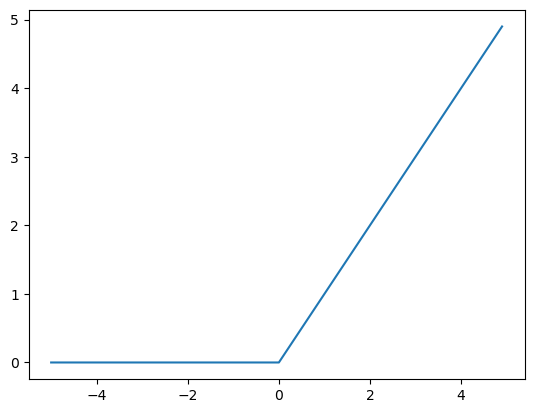

In [30]:
def ReLu(x):
    return np.maximum(0, x)

x = np.arange(-5, 5, 0.1)
y = ReLu(x)
plt.plot(x, y)
plt.show()

## 多维数组

### 矩阵乘法

使用`np.dot()`对两个矩阵进行相乘：

In [34]:
A = np.array([[1,2,3],[4,5,6]])
print(np.ndim(A), A.shape) # np.ndim获取矩阵维数，A.shape获取A的形状——2行3列
B = np.array([[1,2],[3,4],[5,6]])
print(np.ndim(B),B.shape)
print("A*B为\n",np.dot(A,B))

2 (2, 3)
2 (3, 2)
A*B为
 [[22 28]
 [49 64]]


### 神经网络的内积